MNIST 데이터셋 불러오기

In [32]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame= False)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [33]:
import numpy as np
import pandas as pd

In [34]:
X, y = mnist.data, mnist.target

In [35]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

첫 번째 데이터 이미지로 나타내기

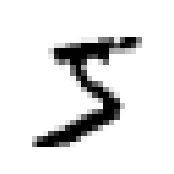

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize = (2, 2))
img = X[0].reshape(28, 28)
plt.imshow(img, cmap = "binary")
plt.axis("off")
plt.show()

In [37]:
# 실제 레이블 값 또한 5임을 알 수 있다.

y[0]

'5'

처음 25개의 데이터 이미지로 나타내기

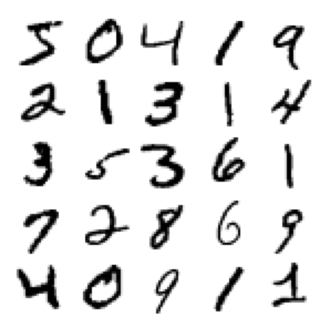

In [38]:
plt.figure(figsize = (4, 4))
for i, x in enumerate(X[:25]):
    plt.subplot(5, 5, i + 1)
    img = X[i].reshape(28, 28)
    plt.imshow(img, cmap = "binary")
    plt.axis("off")

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

레이블 값이 '0', '1', '2' 처럼 문자열이므로 이를 정수로 바꿔준다.

In [39]:
labels = np.unique(y)
mapping = {label : int(label) for label in labels}
y = np.array([mapping[label] for label in y])
y

array([5, 0, 4, ..., 4, 5, 6])

In [40]:
# 훈련셋, 테스트셋 8:2 분할

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [41]:
# 모델 구성

import xgboost as xgb

model = xgb.XGBClassifier(n_estimators = 400,
                          max_depth = 3,
                          learning_rate = 0.1,
                          gamma = 1.0,
                          subsample = 0.8,
                          num_class = 10,
                          n_jobs = -1,
                          device = 'cuda',
                          tree_method = 'hist',
                          random_state = 42)

In [42]:
# 모델 훈련

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=-1, num_class=10,
              num_parallel_tree=None, ...)

In [43]:
predict = model.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predict)

0.9672857142857143

In [45]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.9657149 , 0.96694702, 0.96608807])

In [49]:
predict

array([8, 4, 8, ..., 2, 7, 1], dtype=int64)

In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_test, predict, average='micro')
recall = recall_score(y_test, predict, average='micro')
f1 = f1_score(y_test, predict, average='micro')
print(f'정밀도: {precision}')
print(f'재현율: {recall}')
print(f'F1: {f1}')
conf_matrix = confusion_matrix(y_test, predict)
print(conf_matrix)

정밀도: 0.9672857142857143
재현율: 0.9672857142857143
F1: 0.9672857142857143
[[1320    1    4    0    2    2    3    1    9    1]
 [   0 1576    2    7    3    1    0    5    5    1]
 [   0    7 1329    8    8    1    5    9    8    5]
 [   3    2   15 1364    0   10    1   11   10   17]
 [   2    2    7    2 1250    1    2    3    5   21]
 [   1    4    3   18    0 1227   10    0    9    1]
 [   5    1    0    0    7    8 1369    1    5    0]
 [   1    5   15    2    4    2    0 1456    3   15]
 [   2    5    9   15    5    9    4    6 1293    9]
 [   4    7    3    9   20    3    0   11    5 1358]]


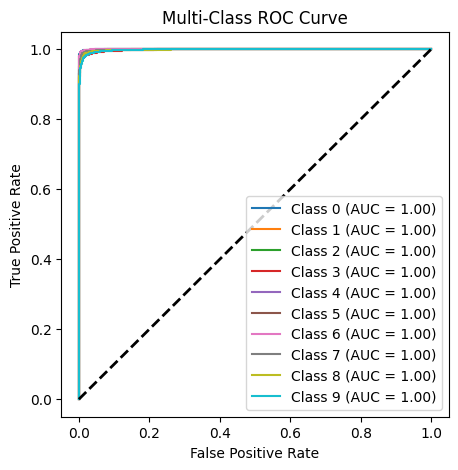

In [58]:
from sklearn.metrics import roc_curve, auc

y_probabilities = model.predict_proba(X_test)

plt.figure(figsize=(5, 5))
for i in range(model.n_classes_):
    fpr, tpr, _ = roc_curve(y_test == i, y_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.show()